In [1898]:
# Dependencies
import pandas as pd
import scipy.stats as st
import numpy as np
import json
import matplotlib.pyplot as plt

In [1899]:
cleaned_us_data_df = "output/cleaned_us_data.csv"

In [1900]:
cleaned_us_data_df = pd.read_csv(cleaned_us_data_df)

In [1901]:
cleaned_us_data_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name',
       'trending_date_formatted', 'trending_day', 'trending_month',
       'trending_year', 'trending_date_formatted_order',
       'publish_time_formatted', 'publish_day', 'publish_month',
       'publish_year', 'tag_count'],
      dtype='object')

In [1902]:
cleaned_us_data_df["video_id"].nunique()

6347

In [1903]:
video_trend_frequency = (cleaned_us_data_df["video_id"].value_counts())
video_trend_frequency

j4KvrAUjn6c    30
8h--kFui1JA    29
r-3iathMo7o    29
MAjY8mCTXWk    29
t4pRQ0jn23Q    29
               ..
oxSlLYC_Exw     1
0devsSCkYRY     1
pA5NbgdpRpk     1
ttf_EzEkxBk     1
cJHA4lLp32M     1
Name: video_id, Length: 6347, dtype: int64

In [1904]:
video_frequency = pd.DataFrame(video_trend_frequency)
video_frequency.head(20)

,video_id
j4KvrAUjn6c,30
8h--kFui1JA,29
r-3iathMo7o,29
MAjY8mCTXWk,29
t4pRQ0jn23Q,29
QBL8IRJ5yHU,29
iILJvqrAQ_w,29
NBSAQenU2Bk,29
vjSohj-Iclc,28
ulNswX3If6U,28


In [1905]:
cleaned_us_data_df.set_index("video_id", inplace=True)

"mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"


In [1906]:
publish_time_day_top_20 = cleaned_us_data_df.loc[["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U","mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"], ['category_name','publish_time_formatted', 'publish_day', 'publish_month','trending_date_formatted_order', 'trending_day', 'trending_month']]
publish_time_day_top_20.groupby("video_id").head(1)

,category_name,publish_time_formatted,publish_day,publish_month,trending_date_formatted_order,trending_day,trending_month
video_id,,,,,,,
j4KvrAUjn6c,Entertainment,2018-05-13 18:03:56+00:00,Sunday,May,14/05/2018,Monday,May
8h--kFui1JA,Music,2018-05-09 17:00:00+00:00,Wednesday,May,10/05/2018,Thursday,May
r-3iathMo7o,Science & Technology,2018-05-13 19:00:25+00:00,Sunday,May,15/05/2018,Tuesday,May
MAjY8mCTXWk,Music,2018-05-14 15:59:47+00:00,Monday,May,15/05/2018,Tuesday,May
t4pRQ0jn23Q,Entertainment,2018-05-14 14:00:03+00:00,Monday,May,15/05/2018,Tuesday,May
QBL8IRJ5yHU,Howto & Style,2018-05-14 19:00:01+00:00,Monday,May,15/05/2018,Tuesday,May
iILJvqrAQ_w,Music,2018-05-11 04:00:34+00:00,Friday,May,12/05/2018,Saturday,May
NBSAQenU2Bk,Film & Animation,2018-05-14 13:00:01+00:00,Monday,May,15/05/2018,Tuesday,May
vjSohj-Iclc,Science & Technology,2018-05-10 19:56:28+00:00,Thursday,May,12/05/2018,Saturday,May


In [1907]:
video_id_20 = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U","mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"]
publish_time_20 = [18, 17, 19, 16, 14, 19, 4, 13, 20, 16, 9, 12, 17, 21, 13, 17, 21, 11, 13, 4]

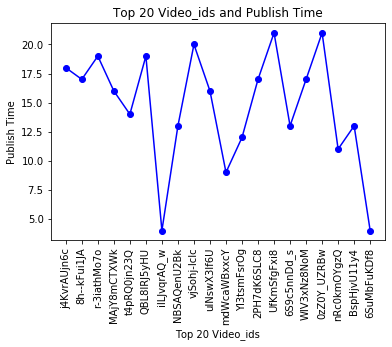

In [1908]:
x_axis = video_id_20
y_axis = publish_time_20
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Top 20 Video_ids")
plt.ylabel("Publish Time")
plt.title("Top 20 Video_ids and Publish Time")
plt.gcf
plt.show()

In [1909]:
video_id_20 = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U","mdWcaWBxxcY", "YI3tsmFsrOg", "2PH7dK6SLC8","UfKmSfgFxi8","6S9c5nnDd_s","WIV3xNz8NoM", "0zZ0Y_UZRBw", "nRc0kmOYgzQ","BspHjvU11y4","6SuMbFuKDf8"]
publish_day_20 = ["Sunday", "Wednesday", "Sunday", "Monday", "Monday","Monday", "Friday", "Monday", "Thursday", "Thursday", "Friday", "Sunday", "Thursday", "Friday", "Tuesday", "Thursday", "Thursday","Saturday", "Sunday", "Thursday"]
category_name_20 = ["Entertainment","Music","Science & Technology","Howto & Style","Film & Animation","Education"]
category_count_20 = [6,6,2,2,3,1]
days_20 =[ "Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday",]
day_count_20 = [4, 1, 1, 6, 3, 1, 4]
publish_month_20 = []
colors = ["orange","purple","green","lightblue","yellow","pink","red"]

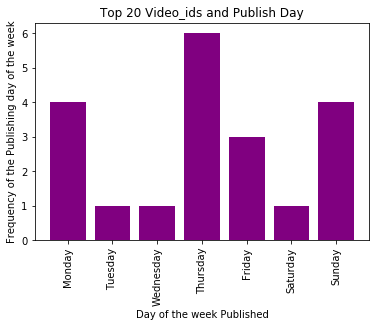

In [1910]:
plt.bar(days_20, day_count_20, color='purple', align="center")
tick_locations = [value for value in days_20]
plt.xticks(tick_locations, days_20, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Top 20 Video_ids and Publish Day")
plt.show()

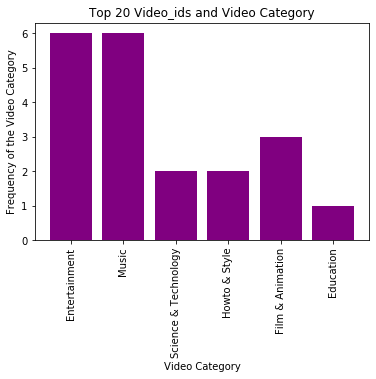

In [1911]:
plt.bar(category_name_20, category_count_20, color='purple', align="center")
tick_locations = [value for value in category_name_20]
plt.xticks(tick_locations, category_name_20, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Video Category")
plt.ylabel("Frequency of the Video Category")
plt.title("Top 20 Video_ids and Video Category")
plt.show()

In [1912]:
# pd.DataFrame(
#     df.groupby(['groupby_col'])['column_to_perform_value_count'].value_counts()
# ).rename(
#     columns={'old_column_name': 'new_column_name'}
# ).reset_index()

In [1913]:
# unique_videos_df = pd.DataFrame(cleaned_us_data_df.groupby(["video_id"].head(1))

In [1914]:
unique_videos_df = cleaned_us_data_df.groupby(["video_id"]).head(1)

In [1915]:
video_publish_day = (unique_videos_df['publish_day'].value_counts())
video_publish_day

Wednesday    1096
Tuesday      1061
Thursday     1053
Friday       1046
Monday        985
Sunday        559
Saturday      547
Name: publish_day, dtype: int64

In [1916]:
video_publish_day.sum()

6347

In [1982]:
unique_video_publish_day_df = pd.DataFrame([video_publish_day])
unique_video_publish_day_df

,Wednesday,Tuesday,Thursday,Friday,Monday,Sunday,Saturday
publish_day,1096,1061,1053,1046,985,559,547


In [1917]:
total_days =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday","Saturday", "Sunday"]
total_days_count = [985, 1061, 1096, 1053, 1046, 547, 559]

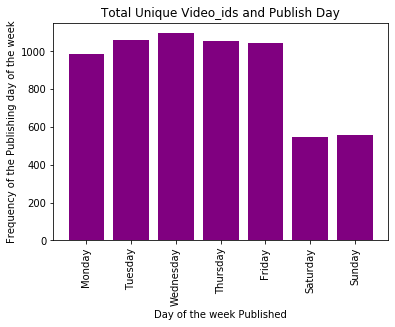

In [1918]:
plt.bar(total_days, total_days_count, color='purple', align="center")
tick_locations = [value for value in total_days]
plt.xticks(tick_locations, total_days, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Total Unique Video_ids and Publish Day")
plt.show()

In [1919]:
video_publish_month = (unique_videos_df['publish_month'].value_counts())
video_publish_month

January      1268
December     1165
February      995
November      972
March         688
May           539
April         536
June          147
October        17
September      10
August          6
July            4
Name: publish_month, dtype: int64

In [1920]:
video_publish_month.sum()

6347

In [ ]:
unique_video_publish_month_df = pd.DataFrame([video_publish_month])
unique_video_publish_month_df

In [1921]:
total_months =["January", "February", "March", "April", "May","June", "July", "August", "September", "October", "November","December"]
total_months_count = [1286, 995, 688, 536, 539, 147, 4, 6, 10, 17, 972, 1165]

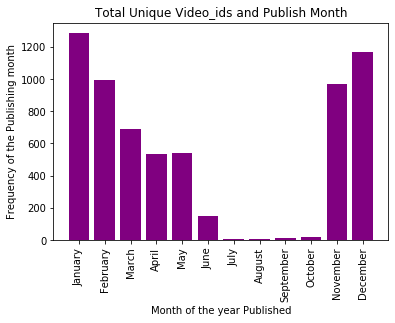

In [1922]:
plt.bar(total_months, total_months_count, color='purple', align="center")
tick_locations = [value for value in total_months]
plt.xticks(tick_locations, total_months, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Month of the year Published")
plt.ylabel("Frequency of the Publishing month")
plt.title("Total Unique Video_ids and Publish Month")
plt.show()

In [1983]:
video_publish_category = (unique_videos_df['category_name'].value_counts())
video_publish_category

Entertainment            1619
Music                     799
Howto & Style             595
Comedy                    547
News & Politics           505
People & Blogs            498
Sports                    451
Science & Technology      380
Film & Animation          318
Education                 250
Pets & Animals            138
Gaming                    103
Autos & Vehicles           70
Travel & Events            60
Nonprofits & Activism      14
Name: category_name, dtype: int64

In [1984]:
video_publish_category.sum()

6347

In [1925]:
video_frequency = pd.DataFrame(video_trend_frequency)
video_frequency.head(20)

,video_id
j4KvrAUjn6c,30
8h--kFui1JA,29
r-3iathMo7o,29
MAjY8mCTXWk,29
t4pRQ0jn23Q,29
QBL8IRJ5yHU,29
iILJvqrAQ_w,29
NBSAQenU2Bk,29
vjSohj-Iclc,28
ulNswX3If6U,28


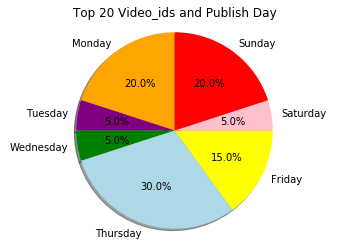

In [1926]:
plt.pie(day_count_20, labels=days_20, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# plt.patch.set_facecolor("white")
plt.axis("equal")
plt.title("Top 20 Video_ids and Publish Day")
plt.show()

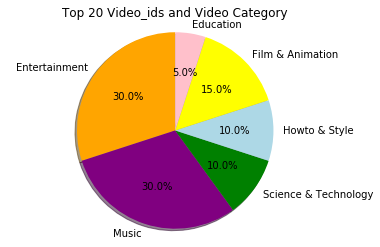

In [1927]:
plt.pie(category_count_20, labels=category_name_20, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# plt.patch.set_facecolor("white")
plt.axis("equal")
plt.title("Top 20 Video_ids and Video Category")
plt.show()

In [1928]:
publish_time_day_top_10 = cleaned_us_data_df.loc[["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U"], ['category_name','publish_time_formatted', 'publish_day', 'publish_month']]
publish_time_day_top_10.groupby("video_id").head(1)

,category_name,publish_time_formatted,publish_day,publish_month
video_id,,,,
j4KvrAUjn6c,Entertainment,2018-05-13 18:03:56+00:00,Sunday,May
8h--kFui1JA,Music,2018-05-09 17:00:00+00:00,Wednesday,May
r-3iathMo7o,Science & Technology,2018-05-13 19:00:25+00:00,Sunday,May
MAjY8mCTXWk,Music,2018-05-14 15:59:47+00:00,Monday,May
t4pRQ0jn23Q,Entertainment,2018-05-14 14:00:03+00:00,Monday,May
QBL8IRJ5yHU,Howto & Style,2018-05-14 19:00:01+00:00,Monday,May
iILJvqrAQ_w,Music,2018-05-11 04:00:34+00:00,Friday,May
NBSAQenU2Bk,Film & Animation,2018-05-14 13:00:01+00:00,Monday,May
vjSohj-Iclc,Science & Technology,2018-05-10 19:56:28+00:00,Thursday,May


"Entertainment","Music","Science & Technology","Music","Howto & Style","Music","Film & Animation","Science & Technology	","Film & Animation"

In [1929]:
video_id = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U"]
publish_time = [18, 17, 19, 16, 14, 19, 4, 13, 20, 16]

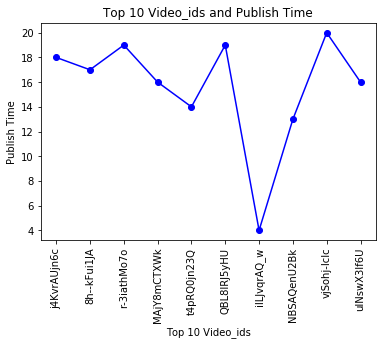

In [1930]:
x_axis = video_id
y_axis = publish_time
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Top 10 Video_ids")
plt.ylabel("Publish Time")
plt.title("Top 10 Video_ids and Publish Time")
plt.gcf
plt.show()

In [1931]:
video_id = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U"]
publish_day = ["Sunday", "Wednesday", "Sunday", "Monday", "Monday","Monday", "Friday", "Monday", "Thursday", "Thursday"]
category_name = ["Entertainment","Music","Science & Technology","Howto & Style","Film & Animation"]
category_count = [2,3,2,1,2]
days =[ "Monday","Wednesday", "Thursday","Friday","Sunday",]
day_count = [4, 1, 2, 1, 2, ]
colors = ["orange","green","lightblue","yellow","red"]

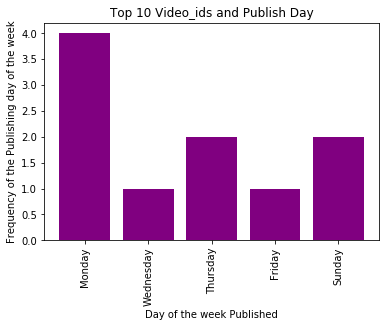

In [1932]:
plt.bar(days, day_count, color='purple', align="center")
tick_locations = [value for value in days]
plt.xticks(tick_locations, days, rotation='vertical')
# plt.xlim(-0.75, len(days_20)-0.25)
# plt.ylim(0, max(day_count_20)+2)
plt.xlabel("Day of the week Published")
plt.ylabel("Frequency of the Publishing day of the week")
plt.title("Top 10 Video_ids and Publish Day")
plt.show()

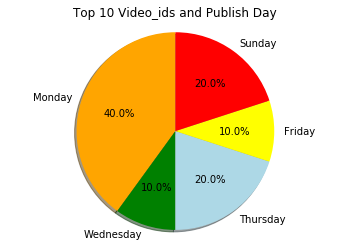

In [1933]:
plt.pie(day_count, labels=days, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# plt.patch.set_facecolor("white")
plt.axis("equal")
plt.title("Top 10 Video_ids and Publish Day")
plt.show()

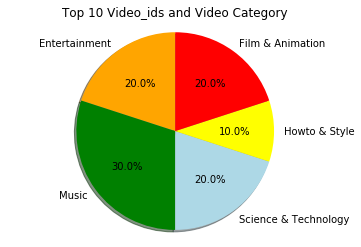

In [1934]:
plt.pie(category_count, labels=category_name, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# plt.patch.set_facecolor("white")
plt.axis("equal")
plt.title("Top 10 Video_ids and Video Category")
plt.show()

In [1935]:
# publish_time = []
# publish_day = []
# video_id = ["j4KvrAUjn6c","8h--kFui1JA", "r-3iathMo7o", "MAjY8mCTXWk", "t4pRQ0jn23Q", "QBL8IRJ5yHU", "iILJvqrAQ_w", "NBSAQenU2Bk", "vjSohj-Iclc", "ulNswX3If6U"]

# # j4KvrAUjn6c	30
# # 8h--kFui1JA	29
# # r-3iathMo7o	29
# # MAjY8mCTXWk	29
# # t4pRQ0jn23Q	29
# # QBL8IRJ5yHU	29
# # iILJvqrAQ_w	29
# # NBSAQenU2Bk	29
# # vjSohj-Iclc	28
# # ulNswX3If6U	28

# for item in video_id:
#     publish_time.append(cleaned_us_data_df['publish_time_formatted'])
#     publish_day.append(cleaned_us_data_df'publish_day')
 
# # Save to a new dataframe 
# publish_time_day_df=pd.DataFrame({"video_id": video_id, "Publish Time": publish_time, "Publish Day":publish_day})

In [1936]:
# cleaned_us_data_df.set_index("video_id", inplace = True)

In [1937]:
result_trend_1_df = cleaned_us_data_df.loc[["j4KvrAUjn6c"]]

In [1938]:
result_trend_1_df.iloc[[0]]

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,trending_date_formatted,trending_day,trending_month,trending_year,trending_date_formatted_order,publish_time_formatted,publish_day,publish_month,publish_year,tag_count
video_id,,,,,,,,,,,,,,,,,,,,,
j4KvrAUjn6c,18.14.05,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Lucas and Marcus,24,2018-05-13T18:03:56.000Z,"Lucas and Marcus|""Marcus and Lucas""|""Dobre""|""D...",2131702,54280,4696,10705,...,2018-05-14,Monday,May,2018,14/05/2018,2018-05-13 18:03:56+00:00,Sunday,May,2018,30


In [1939]:
publish_time_j4KvrAUjn6c= result_trend_1_df[['publish_time_formatted', 'publish_day']]
publish_time_j4KvrAUjn6c.head(1)

,publish_time_formatted,publish_day
video_id,,
j4KvrAUjn6c,2018-05-13 18:03:56+00:00,Sunday


In [1940]:
dates = list(result_trend_1_df["trending_date_formatted_order"])

In [1941]:
views = list(result_trend_1_df["views"])

In [1942]:
likes = list(result_trend_1_df["likes"])

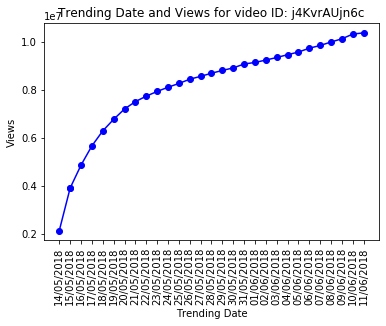

In [1943]:
x_axis = dates
y_axis = views
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: j4KvrAUjn6c")
# plt.gcf
plt.show()

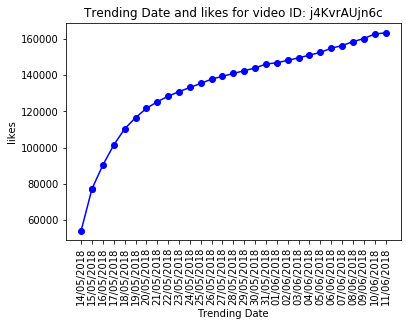

In [1944]:
x_axis = dates
y_axis = likes
plt.plot(x_axis,y_axis,marker='o', color='blue')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("likes")
plt.title("Trending Date and likes for video ID: j4KvrAUjn6c")
# plt.gcf
plt.show()

In [1945]:
result_trend_2_df = cleaned_us_data_df.loc[["8h--kFui1JA"]]

In [1946]:
publish_time_8hkFui1JA = result_trend_2_df[['publish_time_formatted','publish_day']]
publish_time_8hkFui1JA.head(1)

,publish_time_formatted,publish_day
video_id,,
8h--kFui1JA,2018-05-09 17:00:00+00:00,Wednesday


In [1947]:
dates_2 = list(result_trend_2_df["trending_date_formatted_order"])

In [1948]:
views_2 = list(result_trend_2_df["views"])

In [1949]:
likes_2 = list(result_trend_2_df["likes"])

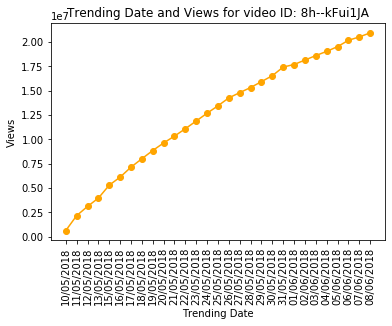

In [1950]:
x_axis = dates_2
y_axis = views_2
plt.plot(x_axis,y_axis,marker='o', color='orange')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: 8h--kFui1JA")
# plt.gcf
plt.show()

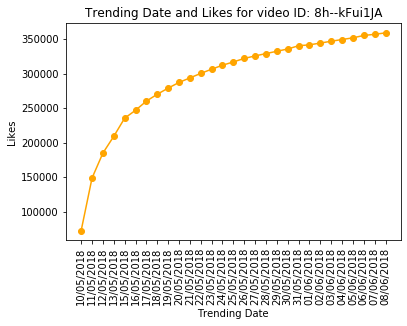

In [1951]:
x_axis = dates_2
y_axis = likes_2
plt.plot(x_axis,y_axis,marker='o', color='orange')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Likes")
plt.title("Trending Date and Likes for video ID: 8h--kFui1JA")
# plt.gcf
plt.show()

In [1952]:
result_trend_3_df = cleaned_us_data_df.loc[["r-3iathMo7o"]]

In [1953]:
publish_time_r3iathMo7o = result_trend_3_df[['publish_time_formatted', 'publish_day']]
publish_time_r3iathMo7o.head(1)

,publish_time_formatted,publish_day
video_id,,
r-3iathMo7o,2018-05-13 19:00:25+00:00,Sunday


In [1954]:
dates_3 = list(result_trend_3_df["trending_date_formatted_order"])

In [1955]:
views_3 = list(result_trend_3_df["views"])

In [1956]:
likes_3 = list(result_trend_3_df["likes"])

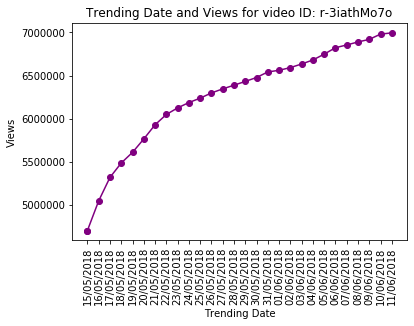

In [1957]:
x_axis = dates_3
y_axis = views_3
plt.plot(x_axis,y_axis,marker='o', color='purple')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Views")
plt.title("Trending Date and Views for video ID: r-3iathMo7o")
# plt.gcf
plt.show()

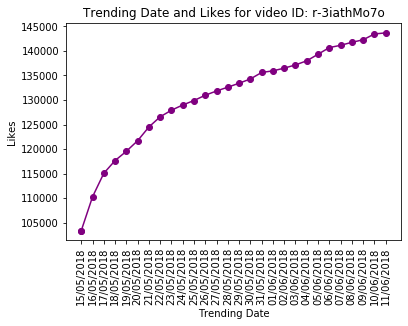

In [1958]:
x_axis = dates_3
y_axis = likes_3
plt.plot(x_axis,y_axis,marker='o', color='purple')
plt.xticks(rotation='vertical')
plt.xlabel("Trending Date")
plt.ylabel("Likes")
plt.title("Trending Date and Likes for video ID: r-3iathMo7o")
# plt.gcf
plt.show()

j4KvrAUjn6c	30
8h--kFui1JA	29
r-3iathMo7o	29
MAjY8mCTXWk	29
t4pRQ0jn23Q	29
QBL8IRJ5yHU	29
iILJvqrAQ_w	29
NBSAQenU2Bk	29
vjSohj-Iclc	28
ulNswX3If6U	28

In [1959]:
result_trend_4_df = cleaned_us_data_df.loc[["MAjY8mCTXWk"]]

In [1960]:
publish_time_MAjY8mCTXWk = result_trend_4_df[['publish_time_formatted', 'publish_day']]
publish_time_MAjY8mCTXWk.head(1)

,publish_time_formatted,publish_day
video_id,,
MAjY8mCTXWk,2018-05-14 15:59:47+00:00,Monday


In [1961]:
result_trend_5_df = cleaned_us_data_df.loc[["t4pRQ0jn23Q"]]

In [1962]:
publish_time_t4pRQ0jn23Q = result_trend_5_df[['publish_time_formatted', 'publish_day']]
publish_time_t4pRQ0jn23Q.head(1)

,publish_time_formatted,publish_day
video_id,,
t4pRQ0jn23Q,2018-05-14 14:00:03+00:00,Monday


In [1963]:
result_trend_6_df = cleaned_us_data_df.loc[["QBL8IRJ5yHU"]]

In [1964]:
publish_time_QBL8IRJ5yHU = result_trend_6_df[['publish_time_formatted', 'publish_day']]
publish_time_QBL8IRJ5yHU.head(1)

,publish_time_formatted,publish_day
video_id,,
QBL8IRJ5yHU,2018-05-14 19:00:01+00:00,Monday


In [1965]:
result_trend_7_df = cleaned_us_data_df.loc[["iILJvqrAQ_w"]]

In [1966]:
publish_time_iILJvqrAQ_w = result_trend_7_df[['publish_time_formatted', 'publish_day']]
publish_time_iILJvqrAQ_w.head(1)

,publish_time_formatted,publish_day
video_id,,
iILJvqrAQ_w,2018-05-11 04:00:34+00:00,Friday


In [1967]:
result_trend_8_df = cleaned_us_data_df.loc[["NBSAQenU2Bk"]]

In [1968]:
publish_time_NBSAQenU2Bk = result_trend_8_df[['publish_time_formatted', 'publish_day']]
publish_time_NBSAQenU2Bk.head(1)

,publish_time_formatted,publish_day
video_id,,
NBSAQenU2Bk,2018-05-14 13:00:01+00:00,Monday


In [1969]:
result_trend_9_df = cleaned_us_data_df.loc[["vjSohj-Iclc"]]

In [1970]:
publish_time_vjSohjIclc = result_trend_9_df[['publish_time_formatted', 'publish_day']]
publish_time_vjSohjIclc.head(1)

,publish_time_formatted,publish_day
video_id,,
vjSohj-Iclc,2018-05-10 19:56:28+00:00,Thursday


In [1971]:
result_trend_10_df = cleaned_us_data_df.loc[["ulNswX3If6U"]]

In [1972]:
publish_time_ulNswX3If6U = result_trend_10_df[['publish_time_formatted', 'publish_day']]
publish_time_ulNswX3If6U.head(1)

,publish_time_formatted,publish_day
video_id,,
ulNswX3If6U,2018-05-10 16:00:11+00:00,Thursday


In [1973]:
publish_time_day_df = cleaned_us_data_df.groupby(["video_id"])
# publish_time_day_df.reset_index(inplace=True)
# publish_time_day_df["trending_date"].count()

In [1974]:
publish_df = publish_time_day_df[['publish_time_formatted', 'publish_day', 'publish_month']]
publish_df.head(15)

,publish_time_formatted,publish_day,publish_month
video_id,,,
2kyS6SvSYSE,2017-11-13 17:13:01+00:00,Monday,November
1ZAPwfrtAFY,2017-11-13 07:30:00+00:00,Monday,November
5qpjK5DgCt4,2017-11-12 19:05:24+00:00,Sunday,November
puqaWrEC7tY,2017-11-13 11:00:04+00:00,Monday,November
d380meD0W0M,2017-11-12 18:01:41+00:00,Sunday,November
...,...,...,...
X9fHoWLf1w0,2018-05-26 16:00:04+00:00,Saturday,May
tiF9SzzzX_o,2018-05-22 02:34:39+00:00,Tuesday,May
Gs26bZTRkdU,2018-05-20 21:00:00+00:00,Sunday,May


In [1975]:
cleaned_us_data_df["publish_time_formatted"]

video_id
2kyS6SvSYSE    2017-11-13 17:13:01+00:00
1ZAPwfrtAFY    2017-11-13 07:30:00+00:00
5qpjK5DgCt4    2017-11-12 19:05:24+00:00
puqaWrEC7tY    2017-11-13 11:00:04+00:00
d380meD0W0M    2017-11-12 18:01:41+00:00
                         ...            
BZt0qjTWNhw    2018-05-18 13:00:04+00:00
1h7KV2sjUWY    2018-05-18 01:00:06+00:00
D6Oy4LfoqsU    2018-05-18 17:34:22+00:00
oV0zkMe1K8s    2018-05-17 17:00:04+00:00
ooyjaVdt-jA    2018-05-17 17:09:38+00:00
Name: publish_time_formatted, Length: 40892, dtype: object

In [1976]:
video_frequency = pd.DataFrame(video_trend_frequency)
video_frequency.tail(20)

,video_id
JR4oPuV3CWg,1
qPEIPu0V8GQ,1
tUg-WLRdRv0,1
mwpHSMv1pI4,1
vlrywa519No,1
ZzefeQ0v5wg,1
MEcqo5fctxI,1
HL3wvhv9QGg,1
Z-0bYA5iZDo,1
faxyAEMDNMg,1


"JR4oPuV3CWg", "qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"

In [1977]:
# publish_time_day_bottom_20 = cleaned_us_data_df.iloc[["JR4oPuV3CWg","qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"]]
# publish_time_day_bottom_20.groupby("video_id").head(1)

In [1978]:
# video_id_bottom_20 = ["JR4oPuV3CWg", "qPEIPu0V8GQ","tUg-WLRdRv0","mwpHSMv1pI4","vlrywa519No","ZzefeQ0v5wg","MEcqo5fctxI","HL3wvhv9QGg","Z-0bYA5iZDo","faxyAEMDNMg","8sAApdJdG3A","07JQ4WZJIbg","LSDCUIn33G4","hxAiXfyYX2E","twdauWqqmrc","oxSlLYC_Exw","0devsSCkYRY","pA5NbgdpRpk","ttf_EzEkxBk","cJHA4lLp32M"]
# publish_time_bottom_20 = []

In [1979]:
# x_axis = video_id_bottom_20
# y_axis = publish_time_bottom_20
# plt.plot(x_axis,y_axis,marker='o', color='blue')
# plt.xticks(rotation='vertical')
# plt.xlabel("Bottom 20 Video_ids")
# plt.ylabel("Publish Time")
# plt.title("Bottom 20 Video_ids and Publish Time")
# plt.gcf
# plt.show()

In [1980]:
#Most viewed category for each month
cleaned_us_data_group_by_months_df = cleaned_us_data_df.groupby("publish_month")
cleaned_us_data_group_by_months_category = cleaned_us_data_group_by_months_df["category_id"].value_counts()
cleaned_us_data_months_category_count_df = cleaned_us_data_group_by_months_category.reset_index(name = 'category_count')
cleaned_us_data_months_category_max_df = cleaned_us_data_months_category_count_df.loc[cleaned_us_data_months_category_count_df.groupby("publish_month")["category_count"].idxmax()]
cleaned_us_data_months_category_max_df

,publish_month,category_id,category_count
0,April,24,1215
14,August,28,11
19,December,24,1495
34,February,24,1335
49,January,24,1236
64,July,24,5
67,June,24,246
79,March,24,1665
93,May,24,1740
108,November,24,1004


In [1981]:
#Top 5 videos for each categories
top_5_vidoes_foreach_categories_cleaned_us_data_df =  cleaned_us_data_df.sort_values('views',ascending = False).groupby('category_id').head(5)
unique_top_5_vidoes_foreach_categories_cleaned_us_data_df = top_5_vidoes_foreach_categories_cleaned_us_data_df["video_id"].unique()
top_vidoes_details_categories_cleaned_us_data_df=cleaned_us_data_df.loc[cleaned_us_data_df["video_id"].isin(unique_top_5_vidoes_foreach_categories_cleaned_us_data_df)]
top_vidoes_details_categories_cleaned_us_data_df = top_vidoes_details_categories_cleaned_us_data_df.sort_values(by=['video_id', 'views'])
top_vidoes_details_categories_cleaned_us_data_df['views_growth'] = np.where(top_vidoes_details_categories_cleaned_us_data_df.video_id == top_vidoes_details_categories_cleaned_us_data_df.video_id.shift(1), top_vidoes_details_categories_cleaned_us_data_df.views.diff(), 0)
top_vidoes_details_categories_cleaned_us_data_df['trending_date_diffs'] = (pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["trending_date_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern') - pd.to_datetime(top_vidoes_details_categories_cleaned_us_data_df["publish_time_formatted"],unit='ms', utc=True).dt.tz_convert('US/Eastern')).dt.days
top_vidoes_details_categories_cleaned_us_data_df_v1 = top_vidoes_details_categories_cleaned_us_data_df[['video_id', 'category_id','views','publish_time','trending_date_formatted',"publish_time_formatted","views_growth","trending_date_diffs"]]
top_vidoes_details_categories_cleaned_us_data_df_v1

KeyError: 'video_id'